# Imbalanced data

CREDIT: This practical was inspired from [this notebook on imbalanced datasets](https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/classification/notebooks/Correcting%20for%20imbalanced%20datasets.ipynb#scrollTo=gvj-ZuWOoO_2).

## Setup
### Imports

In [2]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
from sklearn.model_selection import train_test_split    # for classification
from sklearn.svm import LinearSVC                       # for classification
from sklearn.metrics import confusion_matrix            # for classification
from sklearn.metrics import accuracy_score              # for classification
import imblearn                                         # for imbalance management
import time                                             # for execution time measurement

### Loading the dataset

In [3]:
df_recipes_balanced = pd.read_csv("recipes_balanced.csv")
df_recipes = pd.read_csv("recipes.csv")

### Observing the dataset

In [4]:
df_recipes.head()

,cuisine,id,ingredient_list
0,greek,10259,"romaine lettuce, black olives, grape tomatoes,..."
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, gr..."
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,indian,22213,"water, vegetable oil, wheat, salt"
4,indian,13162,"black pepper, shallots, cornflour, cayenne pep..."


In [5]:
df_recipes_balanced.head()

,Unnamed: 0,cuisine,id,ingredient_list
0,0,indian,23348,"minced ginger, garlic, oil, coriander powder, ..."
1,1,indian,18869,"chicken, chicken breasts"
2,2,indian,36405,"flour, rose essence, frying oil, powdered milk..."
3,3,indian,11494,"soda, ghee, sugar, khoa, maida flour, milk, oil"
4,4,indian,32675,"tumeric, garam masala, salt, chicken, curry le..."


In [6]:
condition_indian = df_recipes ["cuisine"] == "indian"
df_recipes ["is_indian"] = condition_indian.astype (int)
df_recipes

,cuisine,id,ingredient_list,is_indian
0,greek,10259,"romaine lettuce, black olives, grape tomatoes,...",0
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, gr...",0
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr...",0
3,indian,22213,"water, vegetable oil, wheat, salt",1
4,indian,13162,"black pepper, shallots, cornflour, cayenne pep...",1
...,...,...,...,...
39769,irish,29109,"light brown sugar, granulated sugar, butter, w...",0
39770,italian,11462,"KRAFT Zesty Italian Dressing, purple onion, br...",0
39771,irish,2238,"eggs, citrus fruit, raisins, sourdough starter...",0
39772,chinese,41882,"boneless chicken skinless thigh, minced garlic...",0


*[Your comments here]*

## Classification task

The goal with these datasets will be to detect which recipes are Indian.


### Data Labeling
For each dataset, add a column named `is_indian`, indicating whether the recipe is indian (1) or not (0).
The labeling should be done in place, meaning that we should keep the same dataframes instead of creating new ones.

In [7]:
# Your code here
def label (cuisine) :
    if cuisine == "indian" :
        return 1
    else :
        return 0
df_recipes_balanced ["is_indian"] = df_recipes_balanced ["cuisine"].apply (label)
df_recipes_balanced

,Unnamed: 0,cuisine,id,ingredient_list,is_indian
0,0,indian,23348,"minced ginger, garlic, oil, coriander powder, ...",1
1,1,indian,18869,"chicken, chicken breasts",1
2,2,indian,36405,"flour, rose essence, frying oil, powdered milk...",1
3,3,indian,11494,"soda, ghee, sugar, khoa, maida flour, milk, oil",1
4,4,indian,32675,"tumeric, garam masala, salt, chicken, curry le...",1
...,...,...,...,...,...
5995,5995,moroccan,9788,"ground black pepper, couscous, water, cayenne ...",0
5996,5996,french,26911,"cream of tartar, vegetable oil spray, sugar, w...",0
5997,5997,southern_us,2098,"sugar, crushed ice, bourbon whiskey, mint spri...",0
5998,5998,italian,29985,"fresh basil, large garlic cloves, fettucine, s...",0


### Observing the classes

1. For both datasets, compare the number of examples for each class. What do you notice?
2. Use an appropriate graph to display your observations.
3. What problem(s) can this cause for our classification task?

In [8]:
df_recipes ["is_indian"].value_counts()

0 36771
1 3003
Name: is_indian, dtype: int64

In [9]:
df_recipes_balanced ["is_indian"].value_counts()

1 3000
0 3000
Name: is_indian, dtype: int64

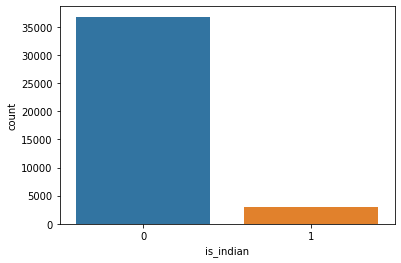

In [10]:
sns.countplot(x='is_indian', data=df_recipes)
plt.show()

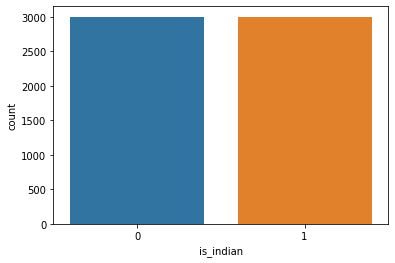

In [11]:
sns.countplot(x='is_indian', data=df_recipes_balanced)
plt.show()

*[Your comments here]*

### Baseline test
#### Data preparation
In order to perform the classification, we first need to convert the ingredient lists into vectors. For this, we will use a TF-IDF vectorizer. Details about this vectorizer, and more insights on how to work with text will be given in the dedicated practical. For now, just use it as is!

*NB: We should use the vectorizer after the train-test split, but we will overlook this issue in this practical.*

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer for each dataset and train it
vectorizer_balanced = TfidfVectorizer()
ingredients_balanced = vectorizer_balanced.fit_transform(df_recipes_balanced.ingredient_list).toarray()

vectorizer = TfidfVectorizer()
ingredients = vectorizer.fit_transform(df_recipes.ingredient_list).toarray()

# In the classification task, the features X are the ingredients, and the label y is whether the recipe is Indian
X_balanced = ingredients_balanced
y_balanced = df_recipes_balanced.is_indian

X = ingredients
y = df_recipes.is_indian

In [13]:
# Split the data into train and test sets
X_train_balanced,  X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, stratify=y_balanced)
X_train,  X_test, y_train, y_test = train_test_split(X, y, stratify=y)

**Question**: In the above cell, what does the "stratify" parameter do in the train-test split?

*[Your answer here]*

#### Baseline classification

For this first test, we will use a linear classifier called LinearSVC.

In [14]:
def classify(input_train, input_test, label_train, label_test):
    classifier = LinearSVC()
    classifier.fit(input_train, label_train)

    label_predicted = classifier.predict(input_test)
    label_true = label_test

    classification_confusion_matrix = confusion_matrix(label_true, label_predicted)
    label_names = pd.Series(['not indian', 'indian'])

    print(f"Accuracy:{accuracy_score(label_true, label_predicted)}")
    return pd.DataFrame(classification_confusion_matrix,
                 columns='Predicted ' + label_names,
                 index='Is ' + label_names)\
        .div(classification_confusion_matrix.sum(axis=1), axis=0) # converts the numbers into percentages

In [15]:
# Test on the balanced dataset
classify(X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced)

Accuracy:0.9426666666666667


,Predicted not indian,Predicted indian
Is not indian,0.953333,0.046667
Is indian,0.068000,0.932000


In [16]:
# Test on the imbalanced dataset
classify(X_train, X_test, y_train, y_test)

Accuracy:0.9782783588093322


,Predicted not indian,Predicted indian
Is not indian,0.992277,0.007723
Is indian,0.193076,0.806924


#### Questions
1. The matrices shown above are called "confusion matrices". Describe what they contain.
2. What do you think is the advantage of using a confusion matrix over using accuracy alone?
3. Compare the results obtained with the balanced dataset and with the imbalanced dataset. What are the main differences?
4. How do you interpret these differences?

*[Your comments here]*

## Managing the imbalance

### Undersampling and oversampling

In this section, we will use 3 different resampling techniques: random undersampling, random oversampling, and SMOTE. We will only need the `df_recipes` dataframe (the balanced dataframe will not be used anymore).
For each of those three techniques, answer the following questions:
1. Using your knowledge and [`imblearn`'s documentation](https://imbalanced-learn.org/stable/references/index.html), explain the principle of the algorithm.
2. Import and instantiate the resampler.
3. Use it to resample the data. On what part of the data should you use the resampler?
4. Observe and comment on the resampling of the classes.
5. Use the `classify` function from earlier to observe the influence of the resampling on classification.
6. Comment on your results.

#### Random undersampling

*[Your answers here]*

#### Random oversampling

*[Your answers here]*

In [ ]:
# Your code here

#### SMOTE

*[Your answers here]*

In [1]:

from imblearn.over_sampling import SMOTE
smote = SMOTE ()
X_smres, y_smres = smote.fit_resample(X_train, y_train)

NameError: NameError: name 'X_train' is not defined

### Bonus: using other methods

There are many methods to deal with imbalanced learning. Check out [`imblearn`'s documentation](https://imbalanced-learn.org/stable/references/index.html) and try using other algorithms. Try to increase the performance of the classification!

In [ ]:
# Your code here

*[Your comments here]*